In [1]:
import makesens.tratamiento.tratamiento as mkt
import makesens.visualizacion.visualizacion as mkv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
#[(mutis,1),(comuneros,2),(itsdz,3),(normal,4)]
#s1 = mkt.loaddata_racimo('data/C_clg_amutis_sum_todos_minutales_2020-12-01.csv',1,10,'1T')
s2 = mkt.loaddata_racimo('data/C_clg_comuneros_sum_todos_minutales_2020-12-01.csv',2,10,'1T')
s3 = mkt.loaddata_racimo('data/C_clg_itsdz_sum_todos_minutales_2020-12-01.csv',3,10,'1T')
s4 = mkt.loaddata_racimo('data/C_clg_normal_sum_todos_minutales_2020-12-01.csv',4,10,'1T')

amb = mkt.loaddata_amb('data/DATOSMINUTOS.csv','csv')
amb.PM10 = pd.to_numeric(amb.PM10)

In [3]:
#Visualización de datos
#mkv.vizualize([s1.pm10_a],['Mutis'],'Fecha','PM10',14,(18,6))
#mkv.vizualize([s2.pm10_a,s3.pm10_a,s4.pm10_a],['Comuneros','Itdz','Normal'],'Fecha','PM10',14,(18,6))
#mkv.vizualize([amb.PM10],['amb'],'Fecha','PM10',14,(18,6))

In [4]:
datastart = '2020-12-04 00:00:00'
dataend = '2020-12-31 23:00:00'
amb,s2,s3,s4 = mkt.cutdata([amb,s2,s3,s4],datastart,dataend)
s2,s3,s4 = mkt.renamecol([s2,s3,s4],[2,3,4])
all_stations = mkt.Merge([amb,s2,s3,s4])

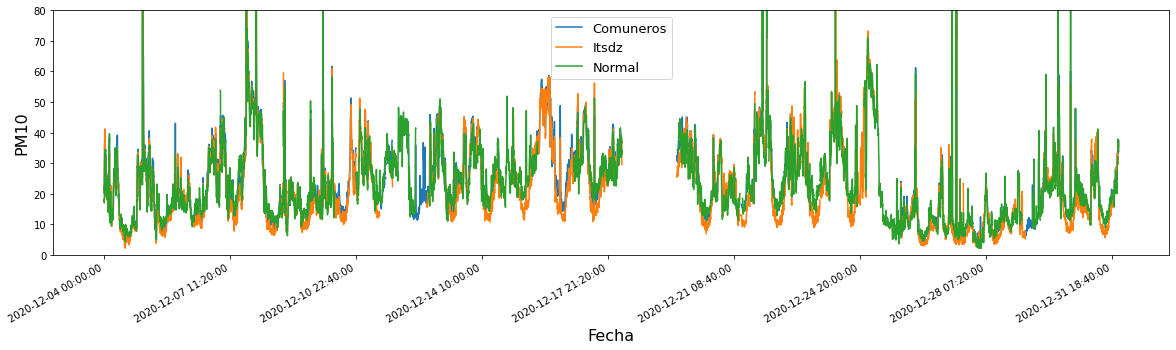

In [5]:
mkv.vizualize([s2.pm10_a2,s3.pm10_a3,s4.pm10_a4],['Comuneros','Itsdz','Normal'],'Fecha','PM10',16,(20,5))

In [6]:
pm10_a2_calS = mkt.LinearModel([all_stations['PM10'],all_stations['pm10_a2']],0.5)
pm10_a2_calM = mkt.LinearModel([all_stations['PM10'],all_stations['pm10_a2'],all_stations['t_2'],all_stations['p_2'],all_stations['h_2']],0.5)
pm10_a2_calR = mkt.RamdonForest([all_stations['PM10'],all_stations['pm10_a2'],all_stations['t_2'],all_stations['p_2'],all_stations['h_2']],0.5)

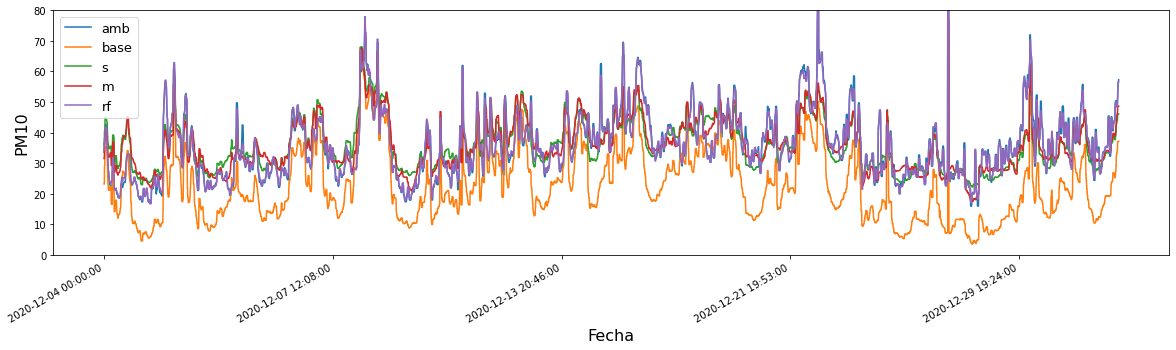

In [8]:
n = 40
mkv.vizualize([mkt.rolling(all_stations['PM10'],n),mkt.rolling(all_stations['pm10_a2'],n),mkt.rolling(pm10_a2_calS,n),mkt.rolling(pm10_a2_calM,n),mkt.rolling(pm10_a2_calR,n) ],['amb','base','s','m','rf'],'Fecha','PM10',16,(20,5))